Optimal values:
a0 = 1.0096
a1 = 0.6126
a2 = 0.1137
b1 = -0.4143
b2 = 0.0484

Optimal objective value: 0.0233


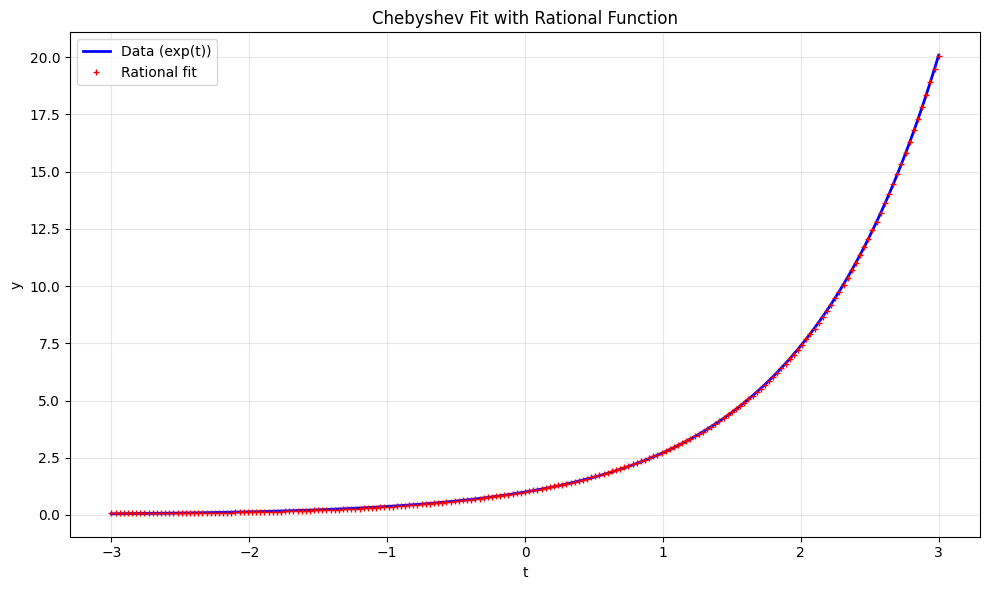

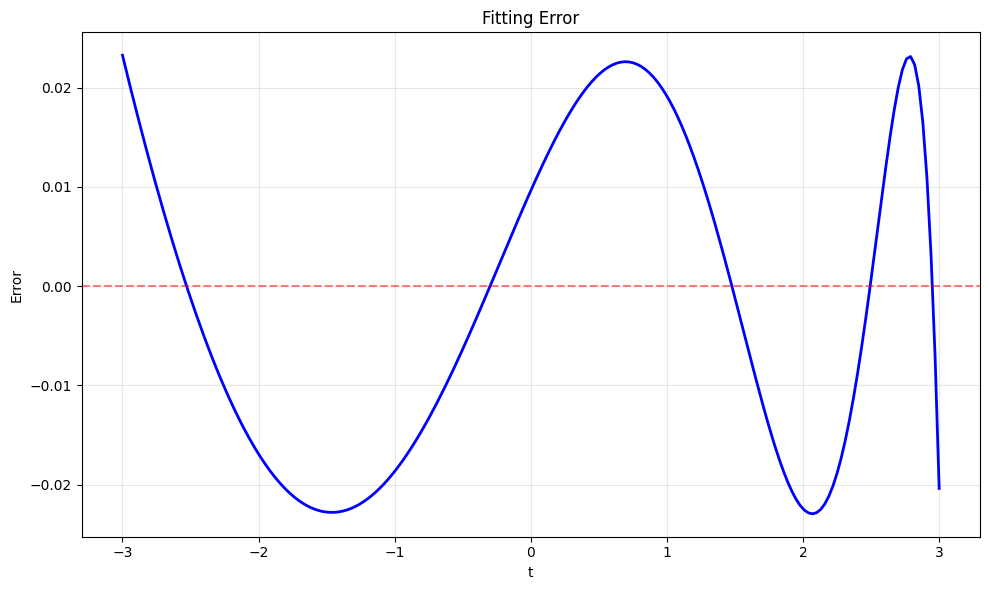

In [18]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Generate data
k = 201
t = np.linspace(-3, 3, k)
y = np.exp(t)

# Create matrix of powers of t
Tpowers = np.column_stack([np.ones(k), t, t**2])

# Initial bounds for bisection
u = np.exp(3)  # upper bound
l = 0          # lower bound
bisection_tol = 1e-3

# Variables to store optimal solution
a_opt = None
b_opt = None
objval_opt = None

# Bisection method
while u - l >= bisection_tol:
    gamma = (l + u) / 2
    
    # Define variables
    a = cp.Variable(3)
    b = cp.Variable(2)
    
    # Compute denominator: 1 + b1*t + b2*t^2
    denom = Tpowers @ cp.hstack([1, b])
    
    # Compute numerator: a0 + a1*t + a2*t^2
    numer = Tpowers @ a
    
    # Constraints: |numerator - y*denominator| <= gamma*denominator
    constraints = [
        numer - cp.multiply(y, denom) <= gamma * denom,
        numer - cp.multiply(y, denom) >= -gamma * denom
    ]
    
    # Solve feasibility problem
    prob = cp.Problem(cp.Minimize(0), constraints)
    prob.solve(solver=cp.ECOS, verbose=False)
    
    # Check if problem is solved
    if prob.status == 'optimal':
        u = gamma
        a_opt = a.value
        b_opt = b.value
        objval_opt = gamma
    else:
        l = gamma

# Print optimal values
print("Optimal values:")
print(f"a0 = {a_opt[0]:.4f}")
print(f"a1 = {a_opt[1]:.4f}")
print(f"a2 = {a_opt[2]:.4f}")
print(f"b1 = {b_opt[0]:.4f}")
print(f"b2 = {b_opt[1]:.4f}")
print(f"\nOptimal objective value: {objval_opt:.4f}")

# fitted
b_extended = np.concatenate([[1], b_opt])
y_fit = (Tpowers @ a_opt) / (Tpowers @ b_extended)

# Plot 1: Data and fitted function
plt.figure(1, figsize=(10, 6))
plt.plot(t, y, 'b-', label='Data (exp(t))', linewidth=2)
plt.plot(t, y_fit, 'r+', label='Rational fit', markersize=4)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Chebyshev Fit with Rational Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Plot 2: Fitting error
plt.figure(2, figsize=(10, 6))
plt.plot(t, y_fit - y, 'b-', linewidth=2)
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Fitting Error')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [ ]:
# additional exercise 2
# Maximum likelihood prediction of team ability. 
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

n = 10
m = 45
sigma = 0.250

train = np.array([
    [1, 2, 1], [1, 3, 1], [1, 4, 1], [1, 5, 1], [1, 6, 1],
    [1, 7, 1], [1, 8, 1], [1, 9, 1], [1, 10, 1], [2, 3, -1],
    [2, 4, -1], [2, 5, -1], [2, 6, -1], [2, 7, -1], [2, 8, -1],
    [2, 9, -1], [2, 10, -1], [3, 4, 1], [3, 5, -1], [3, 6, -1],
    [3, 7, 1], [3, 8, 1], [3, 9, 1], [3, 10, 1], [4, 5, -1],
    [4, 6, -1], [4, 7, 1], [4, 8, 1], [4, 9, -1], [4, 10, -1],
    [5, 6, 1], [5, 7, 1], [5, 8, 1], [5, 9, -1], [5, 10, 1],
    [6, 7, 1], [6, 8, 1], [6, 9, -1], [6, 10, -1], [7, 8, 1],
    [7, 9, 1], [7, 10, -1], [8, 9, -1], [8, 10, -1], [9, 10, 1]
])

A = np.zeros((m, n))
num_games = train.shape[0]

for i in range(num_games):
    j = int(train[i][0])
    k = int(train[i][1])
    y = train[i][2]
    A[i][j - 1] = y
    A[i][k - 1] = -y


a = cp.Variable(n)
objective = cp.Maximize(cp.sum(cp.log_normcdf(A @ a / sigma)))
constraints = [a >= 0, a <= 1]

prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS, verbose=False)

print("result: ", prob.status)
print("a:")
print(np.round(a.value, 6))

In [16]:
#additional exercise 2 - (c)

import numpy as np
import cvxpy as cp

a = [ 1.000008e+00, -1.300000e-05,  6.782720e-01,  3.687010e-01,  7.900210e-01,
  5.813040e-01,  3.873790e-01,  8.543500e-02,  6.700440e-01,  5.774840e-01]

test = np.array([[ 1,  2,  1],
       [ 1,  3,  1],
       [ 1,  4,  1],
       [ 1,  5,  1],
       [ 1,  6,  1],
       [ 1,  7,  1],
       [ 1,  8,  1],
       [ 1,  9,  1],
       [ 1, 10,  1],
       [ 2,  3, -1],
       [ 2,  4,  1],
       [ 2,  5, -1],
       [ 2,  6, -1],
       [ 2,  7, -1],
       [ 2,  8,  1],
       [ 2,  9, -1],
       [ 2, 10, -1],
       [ 3,  4,  1],
       [ 3,  5, -1],
       [ 3,  6,  1],
       [ 3,  7,  1],
       [ 3,  8,  1],
       [ 3,  9, -1],
       [ 3, 10,  1],
       [ 4,  5, -1],
       [ 4,  6, -1],
       [ 4,  7, -1],
       [ 4,  8,  1],
       [ 4,  9, -1],
       [ 4, 10, -1],
       [ 5,  6, -1],
       [ 5,  7,  1],
       [ 5,  8,  1],
       [ 5,  9,  1],
       [ 5, 10,  1],
       [ 6,  7,  1],
       [ 6,  8,  1],
       [ 6,  9,  1],
       [ 6, 10,  1],
       [ 7,  8,  1],
       [ 7,  9, -1],
       [ 7, 10,  1],
       [ 8,  9, -1],
       [ 8, 10, -1],
       [ 9, 10,  1]])

cnt = 0
m = test.shape[0]

for i in range(m):
    j = test[i][0]
    k = test[i][1]
    y = np.sign(a[j-1] - a[k-1])
    if y == test[i][2]:
        cnt += 1

print(f" percentage: {100 * cnt / m}%")

 percentage: 86.66666666666667%


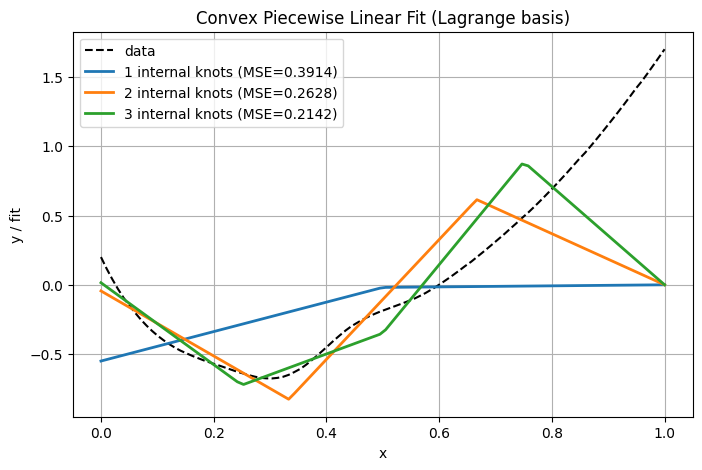

In [17]:
# additional exercise 3
# Piecewise-linear fitting - with Lagrange basis

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

x = np.array([
    0.000, 0.010, 0.020, 0.030, 0.040, 0.051, 0.061, 0.071, 0.081, 0.091,
    0.101, 0.111, 0.121, 0.131, 0.141, 0.152, 0.162, 0.172, 0.182, 0.192,
    0.202, 0.212, 0.222, 0.232, 0.242, 0.253, 0.263, 0.273, 0.283, 0.293,
    0.303, 0.313, 0.323, 0.333, 0.343, 0.354, 0.364, 0.374, 0.384, 0.394,
    0.404, 0.414, 0.424, 0.434, 0.444, 0.455, 0.465, 0.475, 0.485, 0.495,
    0.505, 0.515, 0.525, 0.535, 0.545, 0.556, 0.566, 0.576, 0.586, 0.596,
    0.606, 0.616, 0.626, 0.636, 0.646, 0.657, 0.667, 0.677, 0.687, 0.697,
    0.707, 0.717, 0.727, 0.737, 0.747, 0.758, 0.768, 0.778, 0.788, 0.798,
    0.808, 0.818, 0.828, 0.838, 0.848, 0.859, 0.869, 0.879, 0.889, 0.899,
    0.909, 0.919, 0.929, 0.939, 0.949, 0.960, 0.970, 0.980, 0.990, 1.000
])

y = np.array([
    0.200, 0.117, 0.041, -0.029, -0.093, -0.152, -0.204, -0.252, -0.295, -0.334,
    -0.369, -0.400, -0.428, -0.453, -0.475, -0.495, -0.513, -0.529, -0.545, -0.559,
    -0.573, -0.586, -0.600, -0.614, -0.628, -0.641, -0.653, -0.663, -0.671, -0.675,
    -0.676, -0.672, -0.664, -0.650, -0.630, -0.606, -0.577, -0.544, -0.509, -0.473,
    -0.436, -0.399, -0.364, -0.330, -0.300, -0.273, -0.250, -0.229, -0.211, -0.194,
    -0.179, -0.164, -0.149, -0.134, -0.118, -0.100, -0.080, -0.059, -0.035, -0.010,
    0.017, 0.045, 0.074, 0.104, 0.135, 0.167, 0.200, 0.233, 0.267, 0.301,
    0.336, 0.371, 0.408, 0.444, 0.482, 0.521, 0.560, 0.600, 0.641, 0.683,
    0.726, 0.770, 0.814, 0.860, 0.906, 0.953, 1.001, 1.050, 1.100, 1.151,
    1.202, 1.254, 1.307, 1.361, 1.416, 1.471, 1.527, 1.584, 1.642, 1.700
])

m = len(x)

plt.figure(figsize=(8,5))
plt.plot(x, y, 'k--', label='data')

# 3 cases
for n in range(1,4):
    a_fake = np.linspace(0, 1, n + 2)
    k = len(a_fake)
    a = np.concatenate(([2*a_fake[0] - a_fake[1]], a_fake, [2*a_fake[-1] - a_fake[-2]]))
    
    def f(j, x_val):
        return min(max((x_val - a[j-1]) / (a[j] - a[j-1]), 0),
                   max((a[j+1] - x_val) / (a[j+1] - a[j]), 0))
         
    z = cp.Variable(k)
    
    F = np.zeros((m, k))
    for p in range(m):
        for q in range(k):
            F[p][q] = f(q, x[p])

    # Problem setting &  
    objective = cp.Minimize(cp.norm2(F@z - y))
    constraints = [(z[i+1] - z[i]) / (a[i+1] - a[i]) >= (z[i] - z[i-1]) / (a[i] - a[i-1])
                   for i in range(1, k - 1)]
    prob = cp.Problem(objective, constraints)
    prob.solve()

    y_fit = F @ z.value
    mse = np.mean((y_fit - y)**2)
    plt.plot(x, y_fit, linewidth=2, label=f"{n} internal knots (MSE={mse:.4f})")

plt.legend()
plt.xlabel("x")
plt.ylabel("y / fit")
plt.title("Convex Piecewise Linear Fit (Lagrange basis)")
plt.grid(True)
plt.show()


In [14]:
# additional exercises 4
# Robust least-squares with interval coefficient matrix
import cvxpy as cp
import numpy as np

A_bar = np.array([[60,45,-8],
                  [90,30,-30],
                  [0,-8,-4],
                  [30,10,-10]], float)
b = np.array([-6,-3,18,-9], float)
R = 0.05*np.ones_like(A_bar)

m,n = A_bar.shape
x = cp.Variable(n)
y = cp.Variable(m)
z = cp.Variable(n)

constr = [
    A_bar@x + R@z - b <= y,
    A_bar@x - R@z - b >= -y,
    x <= z, -x <= z
]
prob = cp.Problem(cp.Minimize(cp.norm(y,2)), constr)
prob.solve(solver=cp.ECOS)

x_rls = x.value
nom_res_rls = np.linalg.norm(A_bar@x_rls - b)
wc_res_rls  = np.linalg.norm(y.value)
print(x_rls, nom_res_rls, wc_res_rls)


[-2.81054353e-01  7.74412592e-09 -7.58504747e-01] 17.710584143069546 17.793969011614937


C:\Users\liszt\.conda\envs\cvxpy_env\lib\site-packages\cvxpy\atoms\affine\vec.py:40: FutureWarning: 
    You didn't specify the order of the vec expression. The default order
    used in CVXPY is Fortran ('F') order. This default will change to match NumPy's
    default order ('C') in a future version of CVXPY.
    To suppress this warning, please specify the order explicitly.
    
  warnings.warn(vec_order_warning, FutureWarning)


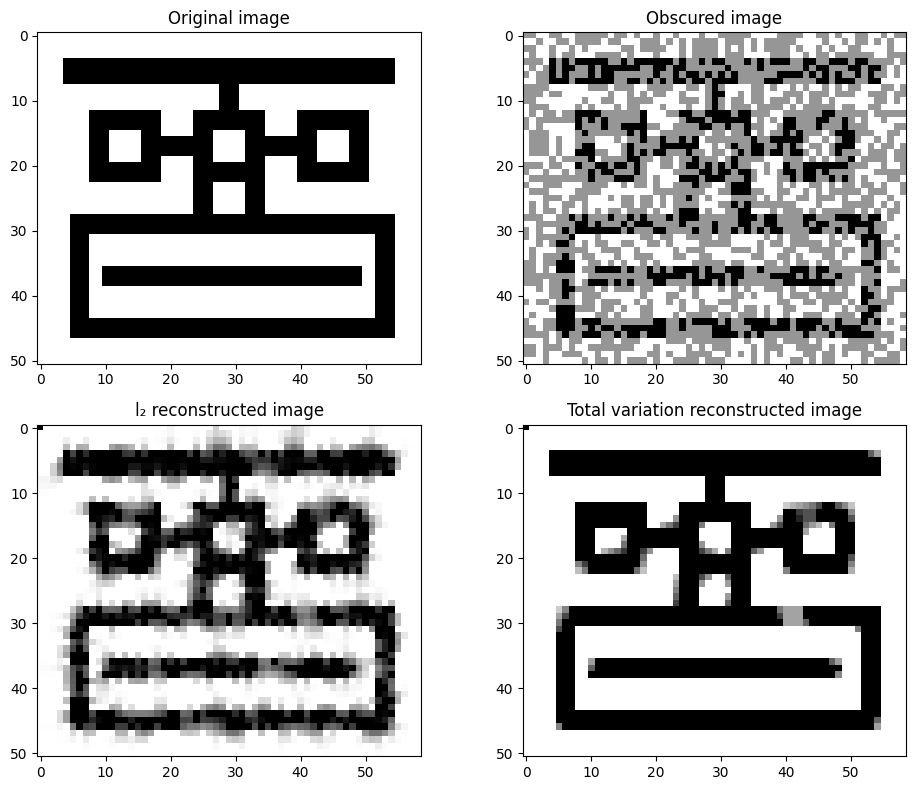

In [20]:
# additional exercises 5
# Total variation image interpolation.

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from PIL import Image

Uorig = np.array(Image.open("flowgray.png").convert("L"), dtype=float)
m, n = Uorig.shape

np.random.seed(1029)
Known = np.random.rand(m, n) > 0.5

# ℓ2 interpolation (smooth reconstruction)

Ul2 = cp.Variable((m, n))
constraints = [cp.multiply(Known, Ul2) == cp.multiply(Known, Uorig)]

Ux = Ul2[1:, 1:] - Ul2[1:, :-1]
Uy = Ul2[1:, 1:] - Ul2[:-1, 1:]

objective = cp.Minimize(cp.norm(cp.hstack([cp.vec(Ux), cp.vec(Uy)]), 2))
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.ECOS, verbose=False)
Ul2_val = Ul2.value

# Total Variation interpolation

Utv = cp.Variable((m, n))
constraints_tv = [cp.multiply(Known, Utv) == cp.multiply(Known, Uorig)]

Ux_tv = Utv[1:, 1:] - Utv[1:, :-1]
Uy_tv = Utv[1:, 1:] - Utv[:-1, 1:]

objective_tv = cp.Minimize(cp.norm(cp.hstack([cp.vec(Ux_tv), cp.vec(Uy_tv)]), 1))
prob_tv = cp.Problem(objective_tv, constraints_tv)
prob_tv.solve(solver=cp.ECOS, verbose=False)
Utv_val = Utv.value


fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.gray()

axes[0, 0].imshow(Uorig)
axes[0, 0].set_title("Original image")
axes[0, 0].axis("image")

axes[0, 1].imshow(Known * Uorig + (256 - 150 * Known))
axes[0, 1].set_title("Obscured image")
axes[0, 1].axis("image")

axes[1, 0].imshow(Ul2_val)
axes[1, 0].set_title("l₂ reconstructed image")
axes[1, 0].axis("image")

axes[1, 1].imshow(Utv_val)
axes[1, 1].set_title("Total variation reconstructed image")
axes[1, 1].axis("image")

plt.tight_layout()
plt.show()


In [21]:
import numpy as np
import cvxpy as cp

n = 5   
p = 20  
m = 30  

np.random.seed(0)
V = np.random.randn(n, p) 

lambda_var = cp.Variable(p)
obj = 0
for k in range(n):
    ek = np.zeros(n)
    ek[k] = 1
    obj = obj + (1/m) * cp.matrix_frac(ek, V @ cp.diag(lambda_var) @ V.T)

prob = cp.Problem(cp.Minimize(obj), [
    cp.sum(lambda_var) == 1,
    lambda_var >= 0
])
prob.solve()


lower_bound = prob.value
print(f"Lower bound: {lower_bound:.6f}")

t = 0.0  
m_rnd = np.maximum(0, np.round(m * lambda_var.value + t)).astype(int)
print(f"Sum(m_rnd): {np.sum(m_rnd)} (should be {m})")

upper_bound = np.trace(np.linalg.inv(V @ np.diag(m_rnd/m) @ V.T)) / m
print(f"Upper bound: {upper_bound:.6f}")

gap = upper_bound - lower_bound
rel_gap = gap / lower_bound
print(f"Gap: {gap:.6f}")
print(f"Relative gap: {rel_gap:.4f} ({rel_gap*100:.2f}%)")

Lower bound: 0.121074
Sum(m_rnd): 30 (should be 30)
Upper bound: 0.121281
Gap: 0.000207
Relative gap: 0.0017 (0.17%)
